In [14]:
#Welcome to the Santa Cruz County Election Results Analyzer. This is not precinct-level analysis or anything, 
#just shows trends over time with new updates (which tend to trend more progressive over time, as younger voters
#generally vote by mail later than older voters).
#To use, first ctrl-a, ctrl-c at the main "results" page, on the first update 
#e.g. https://sccounty01.co.santa-cruz.ca.us/ElectionSites/ElectionResults/Results
#and ctrl-v into a new file with a name like SantaCruz_General2022_1108.txt in the "data" folder,
#the last four digits being the date (mmdd)

In [6]:
#Since ctrl-a misses buttons, election names are not present in the file. You'll need to manually 
#confirm which elections you want and add them to a dictionary. This script 
#helps a little bit by showing the candidates for each race, by line number (left). For initiatives,
#where the candidates are just "yes" and "no", you'll need to check one of the individual vote numbers
#to confirm which it is you want. For example, here we can get the governor's result and add it like
#election_ids = {'Gov':11}

from santa_cruz_results_analyzer import read_results,register_election_ids,check_results_match

fname1 = "/Users/claytonstrawn/Election_updates/data/SantaCruz_General2022_1108.txt"
fname2 = "/Users/claytonstrawn/Election_updates/data/SantaCruz_General2022_1111.txt"
fname3 = "/Users/claytonstrawn/Election_updates/data/SantaCruz_General2022_1114.txt"
fname4 = "/Users/claytonstrawn/Election_updates/data/SantaCruz_General2022_1115.txt"
fname5 = "/Users/claytonstrawn/Election_updates/data/SantaCruz_General2022_1116.txt"
fname6 = "/Users/claytonstrawn/Election_updates/data/SantaCruz_General2022_1117.txt"

line_results1 = read_results(fname1)
line_results2 = read_results(fname2)
line_results3 = read_results(fname3)
line_results4 = read_results(fname4)
line_results5 = read_results(fname5)
line_results6 = read_results(fname6)

id_results1 = register_election_ids(line_results1,check_lines = 4)
id_results2 = register_election_ids(line_results2,check_lines = 4)
id_results3 = register_election_ids(line_results3,check_lines = 4)
id_results4 = register_election_ids(line_results4,check_lines = 4)
id_results5 = register_election_ids(line_results5,check_lines = 4)
id_results6 = register_election_ids(line_results6,check_lines = 4)
print('checking fname1 is compatible with fname2... ',end = '')
check_results_match(id_results1,id_results2)
print('checking fname1 is compatible with fname3... ',end = '')
check_results_match(id_results1,id_results3)
print('checking fname1 is compatible with fname4... ',end = '')
check_results_match(id_results1,id_results4)
print('checking fname1 is compatible with fname5... ',end = '')
check_results_match(id_results1,id_results5)
print('checking fname1 is compatible with fname6... ',end = '')
check_results_match(id_results1,id_results6)


checking fname1 is compatible with fname2... clear!
checking fname1 is compatible with fname3... clear!
checking fname1 is compatible with fname4... clear!
checking fname1 is compatible with fname5... clear!
checking fname1 is compatible with fname6... clear!


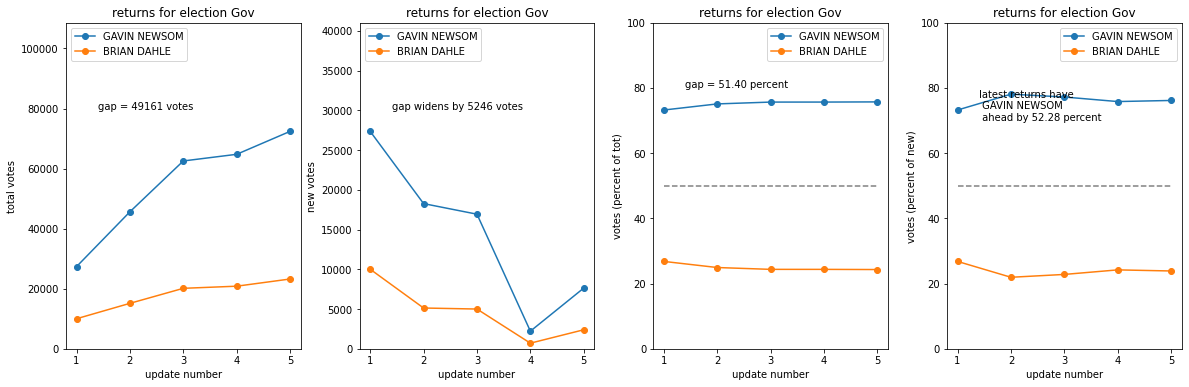

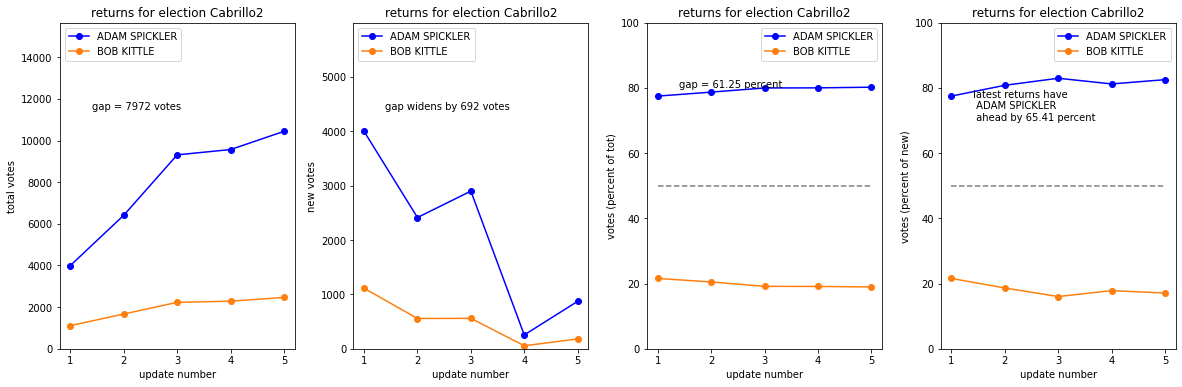

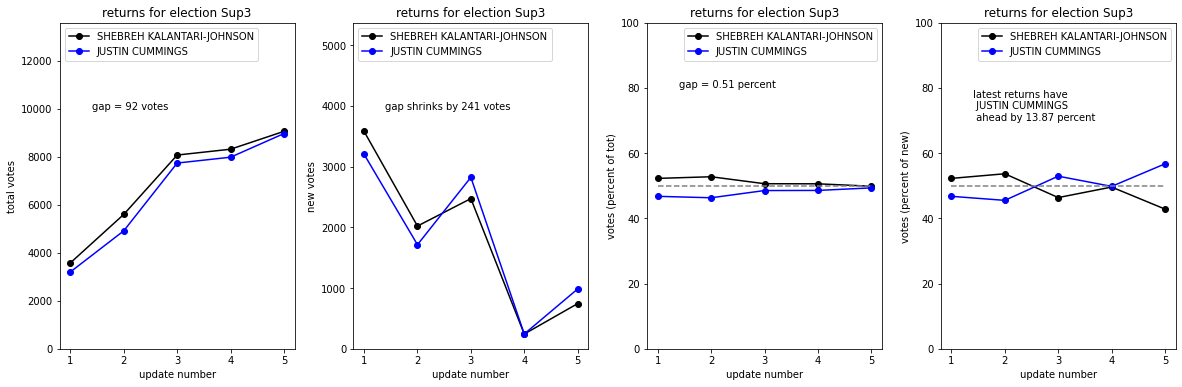

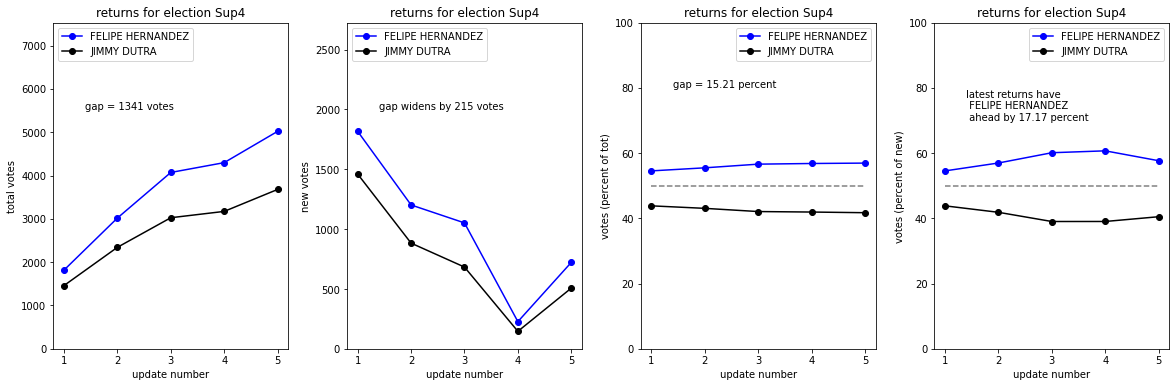

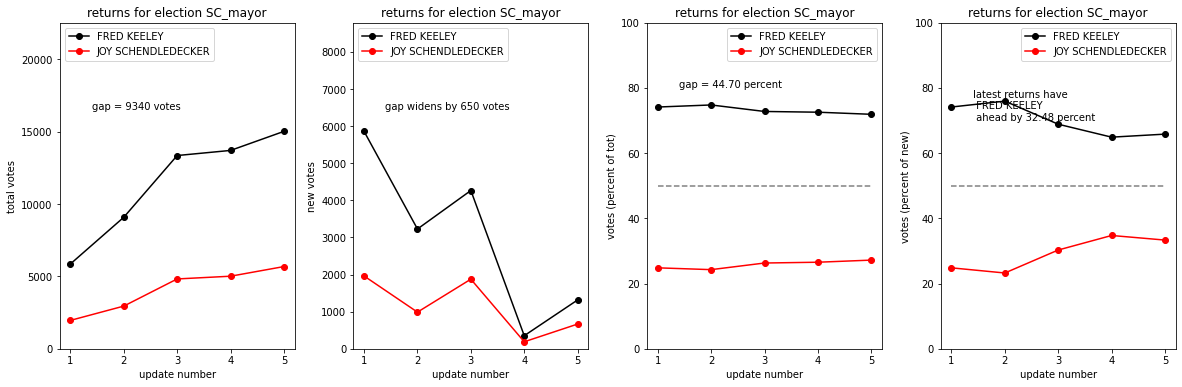

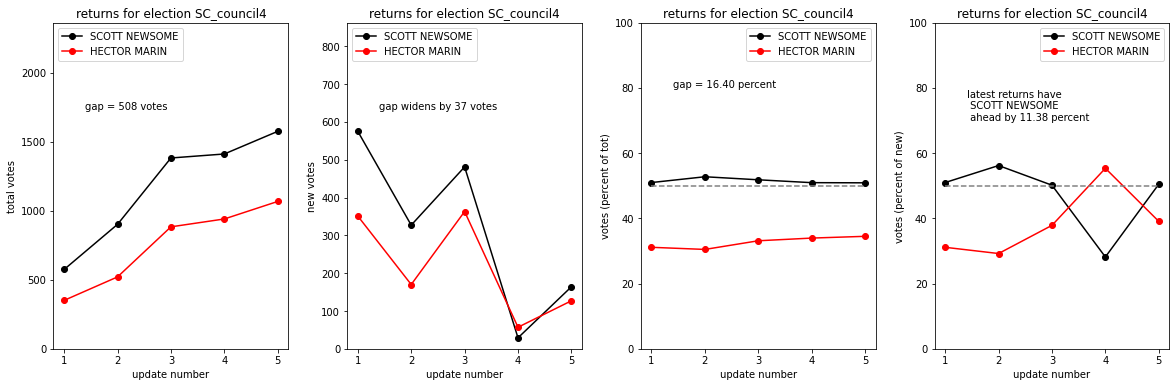

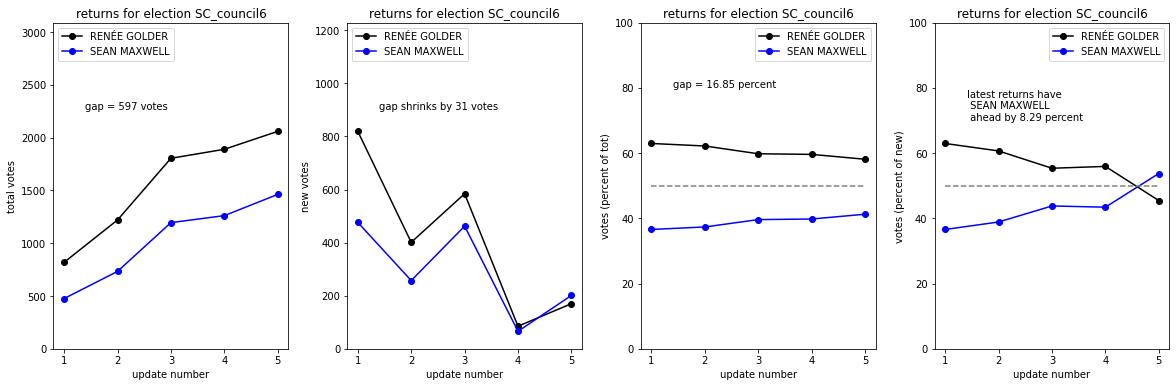

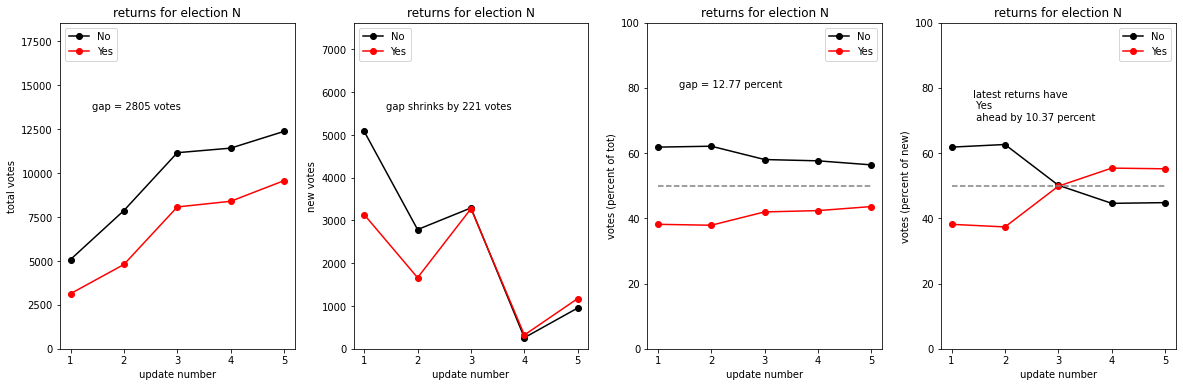

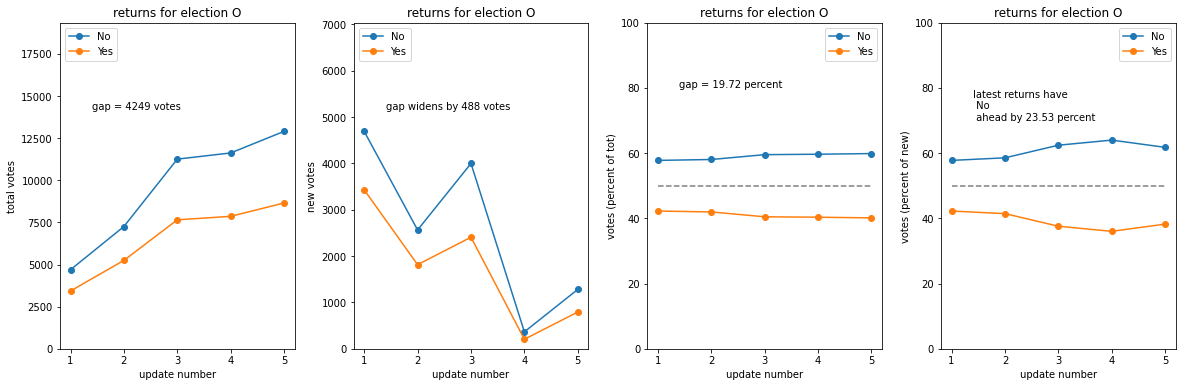

In [10]:
#Add as many fnames as you want! This will show changes over time with new updates, and 
#the old update is saved in your file. You can also identify your preferred candidates in
#each race as "comrades" (red), "friends" (blue), or "enemies" (black) to easily see if 
#elections are going better for you or worse.

from santa_cruz_results_analyzer import read_results,election_results_tracker,plot_results
import matplotlib.pyplot as plt

fname1 = "/Users/claytonstrawn/Election_updates/data/SantaCruz_General2022_1108.txt"
fname2 = "/Users/claytonstrawn/Election_updates/data/SantaCruz_General2022_1111.txt"
fname3 = "/Users/claytonstrawn/Election_updates/data/SantaCruz_General2022_1114.txt"
fname4 = "/Users/claytonstrawn/Election_updates/data/SantaCruz_General2022_1115.txt"
fname5 = "/Users/claytonstrawn/Election_updates/data/SantaCruz_General2022_1116.txt"
fname6 = "/Users/claytonstrawn/Election_updates/data/SantaCruz_General2022_1117.txt"

#'Gov' is here mostly as a good test dataset, because it's always first on the web page.
#Nobody in CA is really looking at the governor's race lmao
election_ids = {'Gov':11,'Cabrillo2':459,'Sup3':686,'Sup4':708,'SC_mayor':764,
                'SC_council4':786,'SC_council6':812,'N':1311,'O':1328}

color_dict = {
              'comrades':[('JOY SCHENDLEDECKER', 'SC_mayor'),('HECTOR MARIN', 'SC_council4'),\
                                ('Yes', 'N')],
              'friends':[('ADAM SPICKLER', 'Cabrillo2'),('JUSTIN CUMMINGS', 'Sup3'),\
                               ('SEAN MAXWELL', 'SC_council6'),('FELIPE HERNANDEZ', 'Sup4')],
              'enemies':[('SHEBREH KALANTARI-JOHNSON', 'Sup3'),('JIMMY DUTRA', 'Sup4'),\
                               ('SCOTT NEWSOME', 'SC_council4'),('RENÉE GOLDER', 'SC_council6'),\
                               ('No', 'N'),('FRED KEELEY', 'SC_mayor')]
              }

for race in election_ids:
    fnames = [fname1,fname2,fname3,fname4,fname5]
    #fnames = [fname1,fname5]
    fig,axes = plt.subplots(1,4,figsize = (20,6))
    for i,percentages in enumerate([False,True]):
        for j,diffs in enumerate([False,True]):
            ax = axes[2*i+j]
            names,results,dates = election_results_tracker(fnames,race,election_ids)
            plot_results(race,names,results,dates,
                     #4 graphs are possible by varying the two variables below. 
                     #False, False: total votes (increasing w/ time)     [shows final vote gap]
                     #True,  False: overall votes as percent of total    [shows final vote gap & 50% line]
                     #False,  True: total new votes per update           [shows final vote gap]
                     #True,   True: percentage of votes from each update [shows final vote gap & 50% line]
                        percentages = percentages,diffs = diffs,
                        keep = 2,use_dates = False,
                        fmt = 'o-',color_dict = color_dict,ax=ax)
    plt.subplots_adjust(wspace=0.25, hspace=0)
